# SYD DAT 7 Homework - Sumary of a chapter of Data Science Handbook

## Summary of Chapter 8 (Kevin Novak)

* Kevin is a Senior Data Scientiist at Uber and also the 20th employee.
* Before Uber, he was Ph.D. candidate in nuclear physics at MSU. Theoretical physics involved lot of computer programming and statistics to evaluate the models.
* Since he always liked to mix a bit computer science in everything, that didn't make him a good fit for academia. Moreover, hiring a nuclear physicst for most of the mainstream companies wasn't justified so when his friend who was working at Uber went to him with a role of his choice, he immediately decided to join Uber in 2011.
* According to Kevin, Data Scientist has 2 main specialties. One is the concept of "Big Data" where large amount of data is processed to derive mathematical insights and other is the opposite specialization where there is a need to make quantifiable decisions based on heterogenous pirces of information.
* Kevin goes on to explain that cleaning of data is very different in the above 2 regimes. On the smaller end, it is more a matter of evaluating the confidence one has in one’s data, while on the bigger scale, it is more about building up a more homogeneous data set to feed into algorithms.
* For aspiring Data Scientists, Kevin says that basic understanding of mathematics and physics will get you 85% there and rest will be the baic coding skills.
* Kevin tells that the requirement of a Data Scientist at Uber and Facebook are quite different as the former is a logistic company so data is the core while the for the latter, the data component is nice add-on.
* To become a top level data scientist, Kevin reckons, having an intuitive problem skill plus the approximation skills will get you 90% there.
* Kevin also talks about the trde-off from academkia mindset to a result-driven mindset by giving an example about Uber where his CEO, Travis, asked him to test a code in Production environment straightaway.
* Lastly he talks about the recent developments in algorithms which can be used to analyze genomes. Also, according to Kevin, problems in healthcare space represent a huge data promise. He ended the interview by asking people to start applying data to real life and try to solve things.

# SYD DAT 7 Homework - Lab and Exercise

In [5]:
import pandas as pd
data = pd.read_csv('ozone.csv')

In [9]:
print data.head()

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


#### Print the column names of the dataset to the screen, one column name per line.  

In [23]:
for x in data.columns.values:
    print x

Ozone
Solar.R
Wind
Temp
Month
Day


#### Extract the first 2 rows of the data frame and print them to the console. What does the output look like?

In [30]:
data_first_2 = data.loc[0:1]
data_first_2

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2


#### How many observations (i.e. rows) are in this data frame?

In [38]:
data.shape[0] # or len(data)

153

#### Extract the last 2 rows of the data frame and print them to the console. What does the output look like?

In [42]:
data_last_2 = data.loc[151:152] #or data.tail(2)
data_last_2

,Ozone,Solar.R,Wind,Temp,Month,Day
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


#### What is the value of Ozone in the 47th row?

In [52]:
data.ix[47]['Ozone']

37.0

#### How many missing values are in the Ozone column of this data frame?

In [62]:
len(data) - data['Ozone'].count()

37

#### What is the mean of the Ozone column in this dataset? Exclude missing values (coded as NA) from this calculation.

In [67]:
data['Ozone'].dropna().mean()

42.12931034482759

#### Extract the subset of rows of the data frame where Ozone values are above 31 and Temp values are above 90. What is the mean of Solar.R in this subset?

In [76]:
data[(data['Ozone'] > 31) & (data['Temp'] > 90)]['Solar.R'].mean()

212.8

#### What is the mean of "Temp" when "Month" is equal to 6?

In [78]:
data[(data['Month'] == 6)]['Temp'].mean()

79.1

#### What was the maximum ozone value in the month of May (i.e. Month = 5)?

In [81]:
data[(data['Month'] == 5)].Ozone.max()

115.0

## Weather

The Bureau of Meteorology keeps long-term data about rainfall, temperatures and so on. You generate a query,
and then you can fetch that same data again for a while before the data is expired.

* Go to http://www.bom.gov.au/climate/data
* There's a pull down for "Data about": choose "Rainfall"
* Select a weather station: choose Sydney
* It will then come up with a list of matching towns: choose Sydney, NSW (the first one in the list)
* It will then give a list of the nearest weather stations.
* Choose 066062 Sydney Observatory
* Select the year 2016
* Click on the "Get Data" button.
* That next page you get will have a URL very similar to this:
http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=136&p_display_type=dailyDataFile&p_startYear=2016&p_c=-872836455&p_stn_num=066062

In [87]:
# Use pandas to read the rainfall table from the web (as described in the previous cell). 
# Ignore the summary statistics.
# Select the 'Monthly Total' row and sum it to get a yearly rainfall
# (Optional) Create a function that returns the yearly rainfall for a given year. Plot rainfall over time

In [89]:
weatherTables = pd.read_html('http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=136&p_display_type=dailyDataFile&p_startYear=2016&p_c=-872838356&p_stn_num=066062')

In [90]:
weather = weatherTables[0]

In [109]:
weather.iloc[33,[1,2,3,4,5,6,7,8,9,10,11,12]].sum()

1385.6000000000001

In [123]:
def yearly_rainfall_calculator(year):
    query = 'http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=136&p_display_type=dailyDataFile&p_startYear=%d&p_c=-872838356&p_stn_num=066062' % (year)
    weatherTables1 = pd.read_html(query)
    weather_for_this_year = weatherTables1[0]
    return weather_for_this_year.iloc[33,[1,2,3,4,5,6,7,8,9,10,11,12]].sum()

yearly_rainfall_calculator(2014)

897.19999999999993

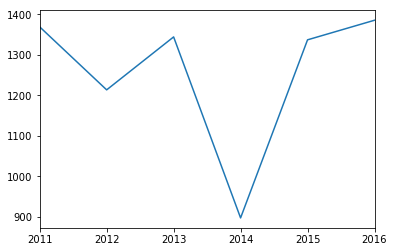

In [129]:
import matplotlib
%matplotlib inline
df = {2011 : yearly_rainfall_calculator(2011), 2012 : yearly_rainfall_calculator(2012), 2013 : yearly_rainfall_calculator(2013), 2014 : yearly_rainfall_calculator(2014), 2015 : yearly_rainfall_calculator(2015), 2016 : yearly_rainfall_calculator(2016)}
s = pd.Series(df)
s.plot.line()

#### Course Project
* Come up with 5 different ideas for your course project. For each one list:
  * Overview of your idea
  * What data you will use, and how you will collect it
  * What the outcome is that you are trying to achieve
  * Any ideas of modelling techniques it may involve

Ideas :-
1. Uber (https://movement.uber.com/cities)
    * Uber is about to share the data of its 2 billion rides so that would be a really good data set to work on. While I don't have any specifics about the data itself, I am sure it will be a good challenge for all the data enthusiasts out there to derive cool models.
    * I want to collect the data about the time taken to complete the rides while looking at the route taken. Also, I want to look at the paths where it took more time and at what time of the day.
    * I think that my study can help the Government by telling them about the condition of the roads which are more frequently used and also about the points which get crowded very quickly. Also, when the data get released, Uber will have few questions in mind which I will be happy to take on.
    
2. eBay
    * eBay has a lot of data to be analyzed and since I am working there, it would be fairly easy for me to get that. I am looking at the purchase behaviour of few thousands of the customers and then predict their next purchase categpry.
    * I will ask the Data Science team at eBay for some of the data they use which will be anonymized ofcourse
    * I am looking at predicting the purchase behaviour of the users based on their past purchases
    * I am not sure about the modelling techniques at the moment
    
3. Airbnb (New User Booking Challenge - https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings)
    * This challenge is hosted on the website kaggle.com (link given) where several datasets are provided. We have the data of train users, test users, sessions' data, countries, age_gender and sample submissions.
    * In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA. 
    There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.
    The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010.

4. General Managing
    * The data is given at this link - http://cricsheet.org/downloads/. It contains ball-by-ball data of the matches.
    * It is aimed at creating clusters of players based on their strengths in order to build a well-rounded team.
    * The outcome is to help teams buy the best players available at the time of auction

5. Predict Stock Prices
    * The data is available here - https://www.quandl.com/open-data. This contains end-of-day prices for over 3000 US companies.
    * This is aimed at predicting 6-month price movements based fundamental indicators from companies' quarterly reports.

